## q_3_b

In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import datetime

In [2]:
new_b2_data = pd.read_csv(r'..\竞赛发布数据\表2-long.csv', dtype = str)

## 根据ID，连接其发病时间
b1_data = pd.read_excel(r'..\竞赛发布数据\表1-患者列表及临床信息.xlsx', dtype = str)
b1_data = b1_data[['Unnamed: 0', '发病到首次影像检查时间间隔']]
b1_data.columns = ['ID', '发病到首次影像检查时间间隔']
b1_data['发病到首次影像检查时间间隔'] = [float(x) for x in b1_data['发病到首次影像检查时间间隔']]
new_b2_data = pd.merge(new_b2_data, b1_data, left_on = "ID", right_on = "ID", how = "left")

## 根据流水号，连接其流水号发生时间
fb1_data = pd.read_csv(r'..\竞赛发布数据\附表1-long.csv', dtype = str)
tmp1, tmp2 = fb1_data[['sub_code', '入院首次检查流水号', '入院首次检查时间点']].copy(), fb1_data[['sub_code', '流水号', '时间点']].copy()
tmp1.columns = ['ID', '流水号', '时间点']
tmp2.columns = ['ID', '流水号', '时间点']
fb1_data = pd.concat([tmp1, tmp2], axis = 0)
fb1_data = fb1_data.drop_duplicates()
new_b2_data = pd.merge(new_b2_data, fb1_data, left_on = ["ID", "流水号"], right_on = ["ID", "流水号"], how = "left")
new_b2_data['时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in new_b2_data['时间点']]

new_b2_data['first_examination'] = 0
for i_row in tqdm(range(len(new_b2_data))):
    tmp_id = new_b2_data.loc[i_row, 'ID']
    tmp_df = new_b2_data[new_b2_data['ID'] == tmp_id]
    tmp_df = tmp_df[tmp_df['follow_up_count'] == '0']['时间点'].values[0]
    
    new_b2_data.loc[i_row, 'first_examination'] = pd.Timestamp(tmp_df)        ## 这里的tmp_df为时间的值
    
    
new_b2_data['time_from_disease'] = new_b2_data['时间点'] - new_b2_data['first_examination']
new_b2_data['time_from_disease'] = [x.days * 24 + x.seconds / 3600 for x in new_b2_data['time_from_disease']]
new_b2_data['time_from_disease'] = new_b2_data['time_from_disease'] + new_b2_data['发病到首次影像检查时间间隔']
new_b2_data = new_b2_data.drop('Unnamed: 0', axis = 1)
new_b2_data

100%|██████████| 593/593 [00:00<00:00, 1449.99it/s]
C:\Users\rukel\AppData\Local\Temp\ipykernel_26992\3468381419.py:29: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  new_b2_data['time_from_disease'] = new_b2_data['时间点'] - new_b2_data['first_examination']


,ID,follow_up_count,流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,...,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,0,...,0,0,0,0,0,0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000
1,sub001,1,20161213000009,74902,0.0003604710154602,0.869683052521962,0.1260179968492163,0,0,0,...,0,0,0,0,0,0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333
2,sub001,2,20161218000100,70952,0.00155034389446386,0.8170594204532642,0.16571766828278273,0,0,0,...,0,0,0,0,0,0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333
3,sub001,3,20161223001020,62831,0.00466330314653595,0.803504639429581,0.17715777243717273,4.77471311932e-05,0,0,...,0,0,0,0,0,0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500
4,sub001,4,20161230000574,44029,0.0003406845488201,0.8355629244361671,0.15478434668059687,0,0,0,...,0,0,0,1.580303102135e-05,0,0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647,0,0.9574993145050726,0.04250068549492734,0,0,0,...,0,0,0,0,0,0,2.8,2020-04-23 11:31:00,2020-04-10 17:40:00,308.650000
589,sub159,0,20200218000582,53154,0,0,0,0,0,0.00457162207924145,...,0,0.14767844767844768,0.7110187110187111,0.12474012474012475,0.00824670824670825,0,3.0,2020-02-18 15:29:00,2020-02-18 15:29:00,3.000000
590,sub159,1,20200219000588,126642,0.0049667566841964,0.00017371803982881,0.00377441922900775,0,0,0.08603780736248638,...,0,0.2781954887218045,0.2863452337136548,0.24060150375939848,0.0250276039749724,0,3.0,2020-02-19 15:01:00,2020-02-18 15:29:00,26.533333
591,sub160,0,20200821002584,49019,0,0.907505253065138,0.09237234541708317,0,0,0,...,0,0,0,0,0,0,4.0,2020-08-21 22:32:00,2020-08-21 22:32:00,4.000000


In [3]:
all_data = new_b2_data.copy()
b3_data = pd.read_excel(r'..\竞赛发布数据\表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx', dtype = str)
b3_data = b3_data.drop('备注', axis = 1)
b3_data
all_data = pd.merge(all_data, b3_data, left_on = '流水号', right_on = '流水号', how = 'left')
all_data

,ID,follow_up_count,流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,sub001,0,20161212002136,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,0,...,8.2475168277392,53.1001741086514,54.2779754005296,2.63018582287957,88.3332032503197,5.42196019201156,54.182743282353,-0.680312081144003,0.156606889760261,116.141179232277
1,sub001,1,20161213000009,74902,0.0003604710154602,0.869683052521962,0.1260179968492163,0,0,0,...,7.60971556999802,59.9236278572824,60.361884698326,15.2700478802359,90.2666885988358,5.13632728539615,60.7220019713707,-0.339908288294849,0.167036790358135,96.3203478330669
2,sub001,2,20161218000100,70952,0.00155034389446386,0.8170594204532642,0.16571766828278273,0,0,0,...,9.77380403761934,47.7340184537346,48.2376631298152,1.89834480899174,94.5474412658169,6.99754400640719,49.2364249629583,-0.0666558192996587,0.134489331713703,145.689025391553
3,sub001,3,20161223001020,62831,0.00466330314653595,0.803504639429581,0.17715777243717273,4.77471311932e-05,0,0,...,8.94644833914501,48.0526655103985,48.6419337249055,4.64100338723968,82.3326046497396,6.3749660060213,49.3138741527377,-0.172438558478659,0.128705402529006,122.799521297807
4,sub001,4,20161230000574,44029,0.0003406845488201,0.8355629244361671,0.15478434668059687,0,0,0,...,7.79998586294558,50.6834928800218,50.7731590839406,9.46276412902799,77.3883474808505,5.5367231639196,51.6013868551928,-0.0413956819526483,0.137752575618392,93.8866748600506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647,0,0.9574993145050726,0.04250068549492734,0,0,0,...,9.08325601823338,38.5976733049922,38.9507525123548,-7.74982429287002,89.7906071292824,6.27010825548553,40.2688553995092,-0.153287615839999,0.138342533510967,131.800330627672
589,sub159,0,20200218000582,53154,0,0,0,0,0,0.00457162207924145,...,8.42321951736631,36.9818758176368,37.0927450538599,-5.55149641438709,72.7136239225377,5.80262808375662,38.494809715066,-0.202350420743231,0.120586881451361,114.191236008031
590,sub159,1,20200219000588,126642,0.0049667566841964,0.00017371803982881,0.00377441922900775,0,0,0.08603780736248638,...,9.32973866587866,45.9119485273227,46.4645153560063,-14.9113517996297,99.8587120346836,6.33696535369756,47.44025217258,-0.288306133981786,0.15144933884727,142.670508622451
591,sub160,0,20200821002584,49019,0,0.907505253065138,0.09237234541708317,0,0,0,...,7.57978646189317,44.837896763698,44.9757630234107,7.59212210902079,71.920477102787,5.20776981749944,45.8573943680413,-0.149272868263067,0.13297087063964,92.4636320340257


In [4]:
b1_data = pd.read_excel(r'..\竞赛发布数据\表1-患者列表及临床信息.xlsx')
b1_data.columns = ['ID', '90天mRS', '数据集划分', '入院首次影像检查流水号', '年龄', '性别', '脑出血前mRS评分',
                    '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔',
                    '血压', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']
b1_data['高压'] = [x.split('/')[0] for x in b1_data['血压']]
b1_data['低压'] = [x.split('/')[1] for x in b1_data['血压']]
b1_data.drop('血压', axis = 1)
b1_data

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,180/90,0,1,1,1,1,1,1,180,90
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,199/120,0,1,1,1,0,1,1,199,120
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,199/120,0,1,1,1,1,1,1,199,120
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,186/99,0,1,1,1,0,0,0,186,99
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,135/92,0,1,1,0,0,1,1,135,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,202/100,0,1,1,1,0,1,1,202,100
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,180/110,1,0,1,1,1,1,1,180,110
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,233/135,0,1,1,1,1,1,1,233,135
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,183/122,0,1,1,1,1,1,1,183,122


In [5]:
all_data = pd.merge(all_data, b1_data, left_on = 'ID', right_on = 'ID', how = 'left')
all_data = all_data[['ID', '90天mRS', '数据集划分','follow_up_count', 'HM_volume', 'HM_ACA_R_Ratio',
                        'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio',
                        'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 'HM_MCA_L_Ratio',
                        'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio',
                        'ED_volume', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio',
                        'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio',
                        'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio',
                        'ED_Cerebellum_L_Ratio', '发病到首次影像检查时间间隔_x',
                        'time_from_disease', 'original_shape_Elongation',
                        'original_shape_Flatness', 'original_shape_LeastAxisLength',
                        'original_shape_MajorAxisLength',
                        'original_shape_Maximum2DDiameterColumn',
                        'original_shape_Maximum2DDiameterRow',
                        'original_shape_Maximum2DDiameterSlice',
                        'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
                        'original_shape_MinorAxisLength', 'original_shape_Sphericity',
                        'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
                        'original_shape_VoxelVolume', 'NCCT_original_firstorder_10Percentile',
                        'NCCT_original_firstorder_90Percentile',
                        'NCCT_original_firstorder_Energy', 'NCCT_original_firstorder_Entropy',
                        'NCCT_original_firstorder_InterquartileRange',
                        'NCCT_original_firstorder_Kurtosis', 'NCCT_original_firstorder_Maximum',
                        'NCCT_original_firstorder_MeanAbsoluteDeviation',
                        'NCCT_original_firstorder_Mean', 'NCCT_original_firstorder_Median',
                        'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range',
                        'NCCT_original_firstorder_RobustMeanAbsoluteDeviation',
                        'NCCT_original_firstorder_RootMeanSquared',
                        'NCCT_original_firstorder_Skewness',
                        'NCCT_original_firstorder_Uniformity',
                        'NCCT_original_firstorder_Variance', 
                        '年龄', '性别', '脑出血前mRS评分', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史',
                        '饮酒史', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗',
                        '镇静、镇痛治疗', '止吐护胃', '营养神经', '高压', '低压']]
all_data['性别'] = pd.get_dummies(all_data['性别'])['男']               ## 1为男性，0为女性
all_data

,ID,90天mRS,数据集划分,follow_up_count,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,...,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,0,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,...,0,0,1,1,1,1,1,1,180,90
1,sub001,4.0,训练,1,74902,0.0003604710154602,0.869683052521962,0.1260179968492163,0,0,...,0,0,1,1,1,1,1,1,180,90
2,sub001,4.0,训练,2,70952,0.00155034389446386,0.8170594204532642,0.16571766828278273,0,0,...,0,0,1,1,1,1,1,1,180,90
3,sub001,4.0,训练,3,62831,0.00466330314653595,0.803504639429581,0.17715777243717273,4.77471311932e-05,0,...,0,0,1,1,1,1,1,1,180,90
4,sub001,4.0,训练,4,44029,0.0003406845488201,0.8355629244361671,0.15478434668059687,0,0,...,0,0,1,1,1,1,1,1,180,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,NaN,测试2,3,3647,0,0.9574993145050726,0.04250068549492734,0,0,...,0,0,1,1,1,1,1,1,233,135
589,sub159,NaN,测试2,0,53154,0,0,0,0,0,...,1,0,1,1,1,1,1,1,183,122
590,sub159,NaN,测试2,1,126642,0.0049667566841964,0.00017371803982881,0.00377441922900775,0,0,...,1,0,1,1,1,1,1,1,183,122
591,sub160,NaN,测试2,0,49019,0,0.907505253065138,0.09237234541708317,0,0,...,0,1,1,1,1,1,1,1,208,95


In [6]:
all_data = pd.concat([all_data[all_data['数据集划分'] == '训练'].dropna(), all_data[all_data['数据集划分'] == '测试2']], axis = 0)
all_data

,ID,90天mRS,数据集划分,follow_up_count,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,...,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,0,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,...,0,0,1,1,1,1,1,1,180,90
1,sub001,4.0,训练,1,74902,0.0003604710154602,0.869683052521962,0.1260179968492163,0,0,...,0,0,1,1,1,1,1,1,180,90
2,sub001,4.0,训练,2,70952,0.00155034389446386,0.8170594204532642,0.16571766828278273,0,0,...,0,0,1,1,1,1,1,1,180,90
3,sub001,4.0,训练,3,62831,0.00466330314653595,0.803504639429581,0.17715777243717273,4.77471311932e-05,0,...,0,0,1,1,1,1,1,1,180,90
4,sub001,4.0,训练,4,44029,0.0003406845488201,0.8355629244361671,0.15478434668059687,0,0,...,0,0,1,1,1,1,1,1,180,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,NaN,测试2,3,3647,0,0.9574993145050726,0.04250068549492734,0,0,...,0,0,1,1,1,1,1,1,233,135
589,sub159,NaN,测试2,0,53154,0,0,0,0,0,...,1,0,1,1,1,1,1,1,183,122
590,sub159,NaN,测试2,1,126642,0.0049667566841964,0.00017371803982881,0.00377441922900775,0,0,...,1,0,1,1,1,1,1,1,183,122
591,sub160,NaN,测试2,0,49019,0,0.907505253065138,0.09237234541708317,0,0,...,0,1,1,1,1,1,1,1,208,95


In [7]:
continuous_feature = ['HM_volume', 'HM_ACA_R_Ratio',
                        'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio',
                        'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 'HM_MCA_L_Ratio',
                        'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio',
                        'ED_volume', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio',
                        'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio',
                        'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio',
                        'ED_Cerebellum_L_Ratio', '发病到首次影像检查时间间隔_x',
                        'time_from_disease', 'original_shape_Elongation',
                        'original_shape_Flatness', 'original_shape_LeastAxisLength',
                        'original_shape_MajorAxisLength',
                        'original_shape_Maximum2DDiameterColumn',
                        'original_shape_Maximum2DDiameterRow',
                        'original_shape_Maximum2DDiameterSlice',
                        'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
                        'original_shape_MinorAxisLength', 'original_shape_Sphericity',
                        'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
                        'original_shape_VoxelVolume', 'NCCT_original_firstorder_10Percentile',
                        'NCCT_original_firstorder_90Percentile',
                        'NCCT_original_firstorder_Energy', 'NCCT_original_firstorder_Entropy',
                        'NCCT_original_firstorder_InterquartileRange',
                        'NCCT_original_firstorder_Kurtosis', 'NCCT_original_firstorder_Maximum',
                        'NCCT_original_firstorder_MeanAbsoluteDeviation',
                        'NCCT_original_firstorder_Mean', 'NCCT_original_firstorder_Median',
                        'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range',
                        'NCCT_original_firstorder_RobustMeanAbsoluteDeviation',
                        'NCCT_original_firstorder_RootMeanSquared',
                        'NCCT_original_firstorder_Skewness',
                        'NCCT_original_firstorder_Uniformity',
                        'NCCT_original_firstorder_Variance', 
                        '年龄', '高压', '低压']
category_feature = ['follow_up_count', '性别', '脑出血前mRS评分', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史',
                        '饮酒史', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗',
                        '镇静、镇痛治疗', '止吐护胃', '营养神经']
for column in continuous_feature:
    all_data[column] = [float(x) for x in all_data[column]]
for column in category_feature:
    all_data[column] = [int(x) for x in all_data[column]]
all_data

,ID,90天mRS,数据集划分,follow_up_count,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,...,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,0,69714.0,0.000258,0.877112,0.120148,0.000000,0.0,...,0,0,1,1,1,1,1,1,180.0,90.0
1,sub001,4.0,训练,1,74902.0,0.000360,0.869683,0.126018,0.000000,0.0,...,0,0,1,1,1,1,1,1,180.0,90.0
2,sub001,4.0,训练,2,70952.0,0.001550,0.817059,0.165718,0.000000,0.0,...,0,0,1,1,1,1,1,1,180.0,90.0
3,sub001,4.0,训练,3,62831.0,0.004663,0.803505,0.177158,0.000048,0.0,...,0,0,1,1,1,1,1,1,180.0,90.0
4,sub001,4.0,训练,4,44029.0,0.000341,0.835563,0.154784,0.000000,0.0,...,0,0,1,1,1,1,1,1,180.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,NaN,测试2,3,3647.0,0.000000,0.957499,0.042501,0.000000,0.0,...,0,0,1,1,1,1,1,1,233.0,135.0
589,sub159,NaN,测试2,0,53154.0,0.000000,0.000000,0.000000,0.000000,0.0,...,1,0,1,1,1,1,1,1,183.0,122.0
590,sub159,NaN,测试2,1,126642.0,0.004967,0.000174,0.003774,0.000000,0.0,...,1,0,1,1,1,1,1,1,183.0,122.0
591,sub160,NaN,测试2,0,49019.0,0.000000,0.907505,0.092372,0.000000,0.0,...,0,1,1,1,1,1,1,1,208.0,95.0


In [8]:
other_columns = [x not in (category_feature + continuous_feature) for x in all_data.columns]
other_columns = list(all_data.columns[other_columns])
other_columns

['ID', '90天mRS', '数据集划分']

In [9]:
preprocess_data = all_data.copy()
def three_sigma(array):
    mu = np.mean(array)
    sigma = np.std(array)
    list_res = []
    for i in array:
        if i > mu + 3 * sigma:
            list_res.append(mu + 3 * sigma)
        elif i < mu - 3 * sigma:
            list_res.append(mu - 3 * sigma)
        else:
            list_res.append(i)
    return list_res

tmp = category_feature
tmp.remove('follow_up_count')
for column in tmp:
    preprocess_data[column] = three_sigma(preprocess_data[column])
preprocess_data

,ID,90天mRS,数据集划分,follow_up_count,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,...,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,0,69714.0,0.000258,0.877112,0.120148,0.000000,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,180.0,90.0
1,sub001,4.0,训练,1,74902.0,0.000360,0.869683,0.126018,0.000000,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,180.0,90.0
2,sub001,4.0,训练,2,70952.0,0.001550,0.817059,0.165718,0.000000,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,180.0,90.0
3,sub001,4.0,训练,3,62831.0,0.004663,0.803505,0.177158,0.000048,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,180.0,90.0
4,sub001,4.0,训练,4,44029.0,0.000341,0.835563,0.154784,0.000000,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,180.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,NaN,测试2,3,3647.0,0.000000,0.957499,0.042501,0.000000,0.0,...,0,0.000000,1,1,1.0,1,1.0,1.0,233.0,135.0
589,sub159,NaN,测试2,0,53154.0,0.000000,0.000000,0.000000,0.000000,0.0,...,1,0.000000,1,1,1.0,1,1.0,1.0,183.0,122.0
590,sub159,NaN,测试2,1,126642.0,0.004967,0.000174,0.003774,0.000000,0.0,...,1,0.000000,1,1,1.0,1,1.0,1.0,183.0,122.0
591,sub160,NaN,测试2,0,49019.0,0.000000,0.907505,0.092372,0.000000,0.0,...,0,0.787213,1,1,1.0,1,1.0,1.0,208.0,95.0


## 数据预处理

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
preprocess_data[continuous_feature] = scaler.fit_transform(preprocess_data[continuous_feature])
preprocess_data

,ID,90天mRS,数据集划分,follow_up_count,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,...,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,sub001,4.0,训练,0,1.135209,-0.367802,1.407037,0.043245,-0.285224,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,0.320978,-0.368605
1,sub001,4.0,训练,1,1.294801,-0.366579,1.388044,0.074031,-0.285224,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,0.320978,-0.368605
2,sub001,4.0,训练,2,1.173292,-0.352357,1.253512,0.282248,-0.285224,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,0.320978,-0.368605
3,sub001,4.0,训练,3,0.923477,-0.315149,1.218860,0.342249,-0.282542,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,0.320978,-0.368605
4,sub001,4.0,训练,4,0.345097,-0.366816,1.300816,0.224905,-0.285224,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,0.320978,-0.368605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,NaN,测试2,3,-0.897120,-0.370888,1.612546,-0.363999,-0.285224,-0.128288,...,0,0.000000,1,1,1.0,1,1.0,1.0,2.455766,2.251944
589,sub159,NaN,测试2,0,0.625797,-0.370888,-0.835293,-0.586907,-0.285224,-0.128288,...,1,0.000000,1,1,1.0,1,1.0,1.0,0.441815,1.494897
590,sub159,NaN,测试2,1,2.886408,-0.311522,-0.834849,-0.567111,-0.285224,-0.128288,...,1,0.000000,1,1,1.0,1,1.0,1.0,0.441815,1.494897
591,sub160,NaN,测试2,0,0.498597,-0.370888,1.484736,-0.102433,-0.285224,-0.128288,...,0,0.787213,1,1,1.0,1,1.0,1.0,1.448791,-0.077433


In [11]:
train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']
test_data = preprocess_data[preprocess_data['数据集划分'] == '测试2']

In [12]:
train_data_FE = train_data[['90天mRS'] + continuous_feature + category_feature]
feature_select = train_data_FE.columns[train_data_FE.corr()['90天mRS'].abs() > 0.1].tolist()
feature_select.remove('90天mRS')
feature_select, len(feature_select)

(['HM_volume',
  'HM_PCA_R_Ratio',
  'HM_ACA_L_Ratio',
  'HM_PCA_L_Ratio',
  'ED_volume',
  'ED_ACA_R_Ratio',
  'ED_MCA_R_Ratio',
  'ED_PCA_R_Ratio',
  'ED_ACA_L_Ratio',
  '发病到首次影像检查时间间隔_x',
  'original_shape_Elongation',
  'original_shape_Flatness',
  'original_shape_LeastAxisLength',
  'original_shape_Maximum2DDiameterColumn',
  'original_shape_Maximum2DDiameterRow',
  'original_shape_Maximum2DDiameterSlice',
  'original_shape_Maximum3DDiameter',
  'original_shape_MeshVolume',
  'original_shape_MinorAxisLength',
  'original_shape_Sphericity',
  'original_shape_SurfaceArea',
  'original_shape_SurfaceVolumeRatio',
  'original_shape_VoxelVolume',
  'NCCT_original_firstorder_10Percentile',
  'NCCT_original_firstorder_90Percentile',
  'NCCT_original_firstorder_Entropy',
  'NCCT_original_firstorder_InterquartileRange',
  'NCCT_original_firstorder_Kurtosis',
  'NCCT_original_firstorder_MeanAbsoluteDeviation',
  'NCCT_original_firstorder_Mean',
  'NCCT_original_firstorder_Median',
  'NCCT_or

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [14]:
train_data_FE = train_data_FE[['90天mRS'] + feature_select].reset_index()

strtfdKFold = KFold(n_splits=10, shuffle=True, random_state=123)
kfold = strtfdKFold.split(train_data_FE[feature_select],  train_data_FE['90天mRS'])

fe_imp = pd.DataFrame()
oob_mse = []

for k, (train, test) in enumerate(kfold):
    rf_reg = RandomForestRegressor(random_state = 1)

    # print(train_data_FE.loc[train, '90天mRS'])
    rf_reg.fit(train_data_FE.loc[train, feature_select], train_data_FE.loc[train, '90天mRS'])
    
    x_test, y_test = train_data_FE.loc[test, feature_select], train_data_FE.loc[test, '90天mRS']
    y_test_pred = rf_reg.predict(x_test)
    # print(y_test, y_test_pred)
    oob_mse.append(mean_squared_error(y_test, y_test_pred))
    
    tmp = pd.DataFrame([rf_reg.feature_importances_],columns = x_test.columns)
    if fe_imp.empty:
        fe_imp = tmp
    else:
        fe_imp = pd.concat([fe_imp, tmp], axis = 0)
    # print(rf_reg.feature_importances_)

    # fet_ind = np.argsort(rf_reg.feature_importances_)[::-1]
    # print(fet_ind)
    # fet_imp = rf_reg.feature_importances_[fet_ind]
    
    # sns.barplot(x = fet_ind, y = fet_imp)
    # plt.show()

In [15]:
oob_mse = np.exp(-np.array(oob_mse))
oob_mse = list(oob_mse/(oob_mse.sum()))
fe_imp_weighed = []

for column in fe_imp.columns:
    tmp = fe_imp[column].to_numpy()
    fe_imp_weighed.append(tmp.dot(oob_mse))

fe_imp_weighed = pd.DataFrame([fe_imp_weighed], columns = fe_imp.columns).T
fe_imp_weighed.columns = ['feature_importance']
fe_imp_weighed = fe_imp_weighed.sort_values('feature_importance', ascending = False)
fe_imp_weighed = fe_imp_weighed[fe_imp_weighed['feature_importance'] >= 0.015]

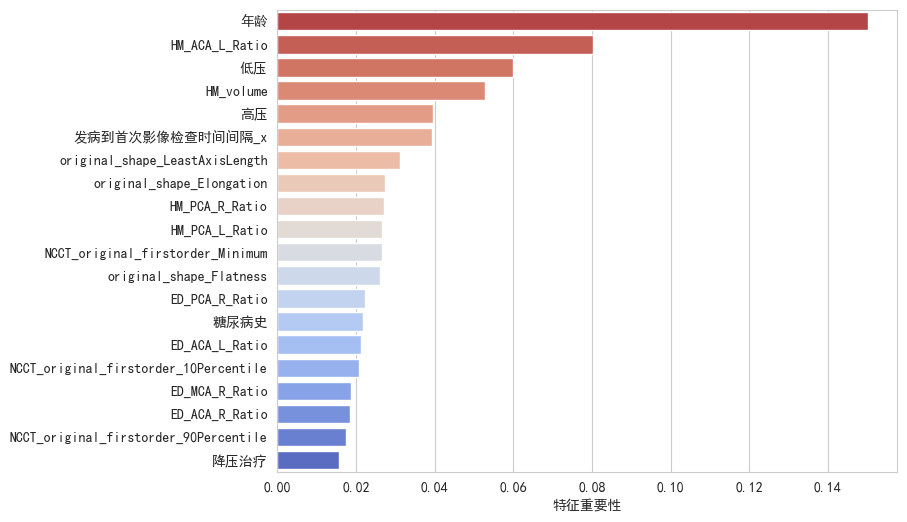

In [16]:
plt.figure(figsize = (8, 6))
sns.barplot(x = fe_imp_weighed['feature_importance'], y = fe_imp_weighed.index, palette = sns.color_palette("coolwarm_r", len(fe_imp_weighed['feature_importance'])))
plt.xlabel('特征重要性')
plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\3b特征工程.png", bbox_inches = 'tight', dpi = 600)

In [17]:
fe_imp_weighed.index

Index(['年龄', 'HM_ACA_L_Ratio', '低压', 'HM_volume', '高压', '发病到首次影像检查时间间隔_x',
       'original_shape_LeastAxisLength', 'original_shape_Elongation',
       'HM_PCA_R_Ratio', 'HM_PCA_L_Ratio', 'NCCT_original_firstorder_Minimum',
       'original_shape_Flatness', 'ED_PCA_R_Ratio', '糖尿病史', 'ED_ACA_L_Ratio',
       'NCCT_original_firstorder_10Percentile', 'ED_MCA_R_Ratio',
       'ED_ACA_R_Ratio', 'NCCT_original_firstorder_90Percentile', '降压治疗'],
      dtype='object')

In [18]:
base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
image_feature_select = list(fe_imp_weighed.index[image_feature_select])
base_feature_select, image_feature_select

(['年龄',
  '低压',
  '高压',
  '发病到首次影像检查时间间隔_x',
  '降压治疗',
  '糖尿病史',
  'follow_up_count',
  'time_from_disease'],
 ['HM_ACA_L_Ratio',
  'HM_volume',
  'original_shape_LeastAxisLength',
  'original_shape_Elongation',
  'HM_PCA_R_Ratio',
  'HM_PCA_L_Ratio',
  'NCCT_original_firstorder_Minimum',
  'original_shape_Flatness',
  'ED_PCA_R_Ratio',
  'ED_ACA_L_Ratio',
  'NCCT_original_firstorder_10Percentile',
  'ED_MCA_R_Ratio',
  'ED_ACA_R_Ratio',
  'NCCT_original_firstorder_90Percentile'])

In [19]:
training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
training_data
base_feature_select.remove('follow_up_count')
## TODO: test_data -> testing_data

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
## baseline
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet

class multi_learner():
    
    learners = ['MLPRegressor', 'XGBoost', 'RandomForest', 'BayesianRidge', 'ElasticNet']
    
    def __init__(self) -> None:
        pass
    
    def load_data(self, data: pd.DataFrame):
        self.train_data = data
        self.train_IDs = self.train_data['ID'].unique()
    
    def _build(self, learner: str):
        if learner == 'MLPRegressor':
            self.learner = MLPRegressor(random_state=20230925)
        if learner == 'XGBoost':
            self.learner = XGBRegressor(random_state=20230925)
        if learner == 'RandomForest':
            self.learner = RandomForestRegressor(random_state=20230925)
        if learner == 'svm':
            self.learner = SVR(random_state=20230925)
        if learner == 'GradientBoosting':
            self.learner = GradientBoostingRegressor(random_state=20230925)
        if learner == 'BayesianRidge':
            self.learner = BayesianRidge(n_iter = 700, tol = 1e-4)
        if learner == 'LinearRegression':
            self.learner = LinearRegression()
        if learner == 'ElasticNet':
            self.learner = ElasticNet(random_state=20230925)
            
    @staticmethod
    def evaluator(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        smape = 100 / len(y_true) * np.sum(
                2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
        micro = precision_score(y_true, y_pred, average = 'micro')
        macro = precision_score(y_true, y_pred, average = 'macro')
        return mse, mae, smape, micro, macro
    
    def train(self, learner, 
                x_columns, 
                y_columns):
        
        strtfdKFold = KFold(n_splits=10, shuffle=True, random_state=123)
        kfold = strtfdKFold.split(self.train_IDs, self.train_IDs)

        oob_mse, oob_mae, oob_smape, oob_micro, oob_macro = [], [], [], [], []

        for k, (train, test) in enumerate(kfold):
            self._build(learner)
            
            k_train_IDs = self.train_IDs[train]
            k_test_IDs = self.train_IDs[test]
            
            train_x, train_y = self.train_data[self.train_data['ID'].isin(k_train_IDs)][x_columns], self.train_data[self.train_data['ID'].isin(k_train_IDs)][y_columns]
            test_df = self.train_data[self.train_data['ID'].isin(k_test_IDs)]
            test_x, test_y = test_df[x_columns], test_df[y_columns]
            
            # print(train_x, train_y)
            self.learner.fit(train_x, train_y)
            test_y_pred = self.learner.predict(test_x)
            
            test_df['y_pred'] = test_y_pred
            # print(test_df)
            tmp = test_df.groupby('ID').mean()
            tmp['y_pred'] = [round(x) for x in tmp['y_pred']]       ## 通过取整来分类
            
            mse, mae, smape, micro, macro = self.evaluator(tmp[y_columns], tmp['y_pred'])
            # print(mse)
            oob_mse.append(mse)
            oob_mae.append(mae)
            oob_smape.append(smape)
            oob_micro.append(micro)
            oob_macro.append(macro)
            
        return np.mean(oob_mse), np.mean(oob_mae), np.mean(oob_smape), np.mean(oob_micro), np.mean(oob_macro)
    
    def run(self, x_columns, y_columns):
        res = pd.DataFrame()
        for learner in multi_learner.learners:
            mse, mae, smape, micro, macro = self.train(learner, x_columns, y_columns)
            tmp = pd.DataFrame([[learner, mse, mae, smape, micro, macro]], 
                                columns = ['learner', 'mse', 'mae', 'msape', 'micro', 'macro'])
            if res.empty:
                res = tmp
            else:
                res = pd.concat([res, tmp], axis = 0)
        return res


In [27]:
m_l = multi_learner()
m_l.load_data(training_data)
res_3b_1 = m_l.run(base_feature_select + image_feature_select, '90天mRS')
for column in list(res_3b_1.columns)[1:]:
    res_3b_1[column] = res_3b_1[column].apply(lambda x: round(x, 2))
res_3b_1.to_csv('../竞赛发布数据/res_3b_rawmodels.csv')

In [30]:
import copy
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
class res_learner():
    
    learners = ['MLPRegressor', 'XGBoost', 'RandomForest', 'BayesianRidge', 'ElasticNet']
    
    def __init__(self) -> None:
        pass
    
    def load_data(self, data: pd.DataFrame):
        self.train_data = data
        self.train_IDs = self.train_data['ID'].unique()
    
    def _build(self, learner: str):
        if learner == 'MLPRegressor':
            self.learner = MLPRegressor(random_state=20230925)
        if learner == 'XGBoost':
            self.learner = XGBRegressor(random_state=20230925)
        if learner == 'RandomForest':
            self.learner = RandomForestRegressor(100, random_state=20230925)
        if learner == 'svm':
            self.learner = SVR(random_state=20230925)
        if learner == 'GradientBoosting':
            self.learner = GradientBoostingRegressor(random_state=20230925)
        if learner == 'BayesianRidge':
            self.learner = BayesianRidge(n_iter = 700, tol = 1e-4)
        if learner == 'LinearRegression':
            self.learner = LinearRegression()
        if learner == 'ElasticNet':
            self.learner = ElasticNet(random_state=20230925)
            
    @staticmethod
    def evaluator(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        smape = 100 / len(y_true) * np.sum(
                2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
        micro = precision_score(y_true, y_pred, average = 'micro')
        macro = precision_score(y_true, y_pred, average = 'macro')
        return round(mse, 3), round(mae, 3), round(smape, 3), round(micro, 3), round(macro, 3)
    
    def residual_learner(self, data: pd.DataFrame, learner, x_columns, y_columns):
        # follow_up_counts = 
        learners = []
        for i in np.sort(np.unique(data['follow_up_count'].to_numpy())):
            if i == 0:
                self._build(learner)
                tmp_df = data[data['follow_up_count'] == i]
                
                i_x, i_y = tmp_df[x_columns], tmp_df[y_columns]
                self.learner.fit(i_x, i_y)
                
                tmp_df['{}_th_error'.format(i)] = i_y - self.learner.predict(i_x)
                
                tmp_df = tmp_df[['ID', '{}_th_error'.format(i)]]
                data = pd.merge(data, tmp_df, left_on = 'ID', right_on = 'ID', how = 'left')
                
                learners.append(copy.deepcopy(self.learner))
            else:
                self._build(learner)
                tmp_df = data[data['follow_up_count'] == i]
                
                i_x, i_y = tmp_df[x_columns], tmp_df['{}_th_error'.format(i - 1)]
                self.learner.fit(i_x, i_y)
                
                tmp_df['{}_th_error'.format(i)] = i_y - self.learner.predict(i_x)
                
                tmp_df = tmp_df[['ID', '{}_th_error'.format(i)]]
                data = pd.merge(data, tmp_df, left_on = 'ID', right_on = 'ID', how = 'left')
                learners.append(copy.deepcopy(self.learner))
        
        return learners
    
    def cal_y_pred(self, test_df: pd.DataFrame, learners, x_columns, is_eval = False):
        res_df = pd.DataFrame()
        for i_ID in test_df['ID'].unique():
            tmp_df = test_df[test_df['ID'] == i_ID]
            tmp_df = tmp_df.sort_values('follow_up_count', ascending = True)
            tmp_df = tmp_df.reset_index()
            # print(tmp_df)
            
            y_pred = []
            for i_row in range(len(tmp_df)):
                if i_row > len(learners) - 1:
                    y_pred.append(0)
                else:
                    
                    tmp_tmp_df = tmp_df[tmp_df['follow_up_count'] == i_row]
                    
                    tmp_learner = learners[i_row]
                    tmp_y_pred = float(tmp_learner.predict(tmp_tmp_df[x_columns]))
                    y_pred.append(tmp_y_pred)
            
            # print(y_pred)
            # print('=============')
            if is_eval:
                y_pred = np.sum(y_pred)
            else:
                y_pred = round(np.clip(np.sum(y_pred), 0, 6))

            i_tmp_df = pd.DataFrame([[i_ID, y_pred]], columns = ['ID', 'y_pred'])
            if res_df.empty:
                res_df = i_tmp_df
            else:
                res_df = pd.concat([res_df, i_tmp_df], axis = 0)
                
        return res_df
    
    def train(self, learner, 
                x_columns, 
                y_columns):
        
        strtfdKFold = KFold(n_splits=10, shuffle=True, random_state=123)
        kfold = strtfdKFold.split(self.train_IDs, self.train_IDs)

        oob_mse, oob_mae, oob_smape, oob_micro, oob_macro = [], [], [], [], []

        for k, (train, test) in enumerate(kfold):
            self._build(learner)
            
            k_train_IDs = self.train_IDs[train]
            k_test_IDs = self.train_IDs[test]
            
            train_df = self.train_data[self.train_data['ID'].isin(k_train_IDs)]
            train_x, train_y = train_df[x_columns], train_df[y_columns]
            
            learners = self.residual_learner(train_df, learner, x_columns, y_columns)
            
            test_df = self.train_data[self.train_data['ID'].isin(k_test_IDs)]
            test_x, test_y = test_df[x_columns], test_df[['ID', y_columns]]
            
            test_res = self.cal_y_pred(test_df, learners, x_columns)
            
            test_y = pd.merge(test_y, test_res, left_on = 'ID', right_on = 'ID', how = 'left')
            
            mse, mae, smape, micro, macro = self.evaluator(test_y[y_columns], test_y['y_pred'])
            # print(mse)
            oob_mse.append(mse)
            oob_mae.append(mae)
            oob_smape.append(smape)
            oob_micro.append(micro)
            oob_macro.append(macro)
            
        return np.mean(oob_mse), np.mean(oob_mae), np.mean(oob_smape), np.mean(oob_micro), np.mean(oob_macro)
            # learners = self.
            
    def run(self, x_columns, y_columns):
        res = pd.DataFrame()
        for learner in res_learner.learners:
            mse, mae, smape, micro, macro = self.train(learner, x_columns, y_columns)
            tmp = pd.DataFrame([[learner, mse, mae, smape, micro, macro]], 
                                columns = ['learner', 'mse', 'mae', 'msape', 'micro', 'macro'])
            if res.empty:
                res = tmp
            else:
                res = pd.concat([res, tmp], axis = 0)
        return res

In [31]:
# base_feature_select.remove('follow_uo_count')
res_l = res_learner()
res_l.load_data(training_data)
res_3b_2 = res_l.run(base_feature_select + image_feature_select, '90天mRS')
for column in list(res_3b_2.columns)[1:]:
    res_3b_2[column] = res_3b_2[column].apply(lambda x: round(x, 2))
res_3b_2.to_csv('../竞赛发布数据/res_3b_resmodels.csv')
# a = res_l.residual_learner(training_data, 'RandomForest', base_feature_select + image_feature_select, '90天mRS')
# res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)

In [32]:
train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']
test_data = preprocess_data[preprocess_data['数据集划分'] == '测试2']

base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
image_feature_select = list(fe_imp_weighed.index[image_feature_select])
base_feature_select, image_feature_select

training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
training_data
base_feature_select.remove('follow_up_count')

res_l_test = res_learner()
res_l_test.load_data(training_data)
a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
sl3 = res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
sl3.to_csv('../竞赛发布数据/res_3b_train.csv')

In [26]:
base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
image_feature_select = list(fe_imp_weighed.index[image_feature_select])
test_data = preprocess_data
test_data = test_data.fillna(test_data.mean())
test_data = test_data[test_data['数据集划分'] == '测试2']

testing_data = test_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
testing_data
base_feature_select.remove('follow_up_count')
testing_data

,ID,90天mRS,年龄,低压,高压,发病到首次影像检查时间间隔_x,降压治疗,糖尿病史,follow_up_count,time_from_disease,...,original_shape_Elongation,ED_PCA_R_Ratio,NCCT_original_firstorder_Minimum,HM_PCA_R_Ratio,ED_MCA_R_Ratio,HM_PCA_L_Ratio,ED_ACA_L_Ratio,NCCT_original_firstorder_10Percentile,NCCT_original_firstorder_90Percentile,ED_ACA_R_Ratio
480,sub131,2.644342,1.123852,1.378428,1.086280,-0.375189,1.0,0,0,-0.390508,...,1.542321e-16,-0.657515,-4.920542e-17,-0.586907,-0.991243,-0.565451,2.862901,2.303144e-16,-1.344879e-16,-0.556212
481,sub131,2.644342,1.123852,1.378428,1.086280,-0.375189,1.0,0,1,-0.363665,...,1.542321e-16,-0.637848,-4.920542e-17,-0.585819,-0.915541,-0.441496,2.343346,2.303144e-16,-1.344879e-16,-0.555437
482,sub132,2.644342,0.545644,0.155505,0.562652,-0.597303,1.0,0,0,-0.392512,...,1.542321e-16,-0.417347,-4.920542e-17,-0.076264,-0.262276,-0.119752,0.188060,2.303144e-16,-1.344879e-16,2.959621
483,sub132,2.644342,0.545644,0.155505,0.562652,-0.597303,1.0,0,1,-0.385461,...,1.542321e-16,1.151727,-4.920542e-17,0.154079,0.427258,-0.552364,-0.515620,2.303144e-16,-1.344879e-16,0.672473
484,sub133,2.644342,-1.044428,1.611366,0.320978,-0.153075,1.0,0,0,-0.388504,...,-5.251517e-01,-0.630894,-9.595693e-01,-0.578717,-0.991243,1.811778,2.776476,-4.998277e-01,-2.197012e-01,-0.551651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,sub158,2.644342,-0.393944,2.251944,2.455766,-0.197498,1.0,0,3,0.224067,...,1.170276e+00,0.193770,-8.056650e-01,-0.363999,1.237733,-0.565451,-0.519607,-7.845984e-01,-3.322948e-01,-0.069509
589,sub159,2.644342,-1.116704,1.494897,0.441815,-0.153075,1.0,0,0,-0.388504,...,-4.013153e-01,-0.657515,-6.595939e-01,-0.586907,-0.991243,0.199268,0.620756,-8.069072e-01,-5.035808e-01,-0.556212
590,sub159,2.644342,-1.116704,1.494897,0.441815,-0.153075,1.0,0,1,-0.341339,...,6.618327e-01,-0.469236,-1.281523e+00,-0.567111,-0.986533,0.225158,1.628599,-1.050407e-01,3.254648e-01,-0.524921
591,sub160,2.644342,1.268404,-0.077433,1.448791,0.069038,1.0,1,0,-0.386499,...,-1.085538e+00,-0.108614,2.137531e-01,-0.102433,0.854837,-0.565451,-0.519607,1.166417e-02,9.185785e-04,1.635174


In [27]:
# testing_data = testing_data.fillna(testing_data.mean())
# testing_data

In [28]:
res_l_test = res_learner()
res_l_test.load_data(training_data)
a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
res_3b = res_l_test.cal_y_pred(testing_data, a, base_feature_select + image_feature_select)
res_3b.to_csv('../竞赛发布数据/res_3b.csv')

## 3 C

In [30]:
cor_data = preprocess_data[preprocess_data['数据集划分'] == '训练']
cor_data = cor_data[['90天mRS'] + list(fe_imp_weighed.index)]
cor_data

,90天mRS,年龄,HM_ACA_L_Ratio,HM_volume,低压,发病到首次影像检查时间间隔_x,original_shape_Flatness,original_shape_LeastAxisLength,高压,original_shape_Elongation,...,ED_PCA_R_Ratio,NCCT_original_firstorder_Minimum,HM_PCA_R_Ratio,ED_MCA_R_Ratio,HM_PCA_L_Ratio,ED_ACA_L_Ratio,NCCT_original_firstorder_10Percentile,NCCT_original_firstorder_90Percentile,ED_ACA_R_Ratio,降压治疗
0,4.0,-1.405808,-0.384873,1.135209,-0.368605,-0.264132,-0.413047,0.369769,0.320978,0.498737,...,0.471425,-0.115950,0.043245,0.980524,-0.565451,-0.519607,0.586779,0.735581,0.471856,1.0
1,4.0,-1.405808,-0.384873,1.294801,-0.368605,-0.264132,-0.145687,0.772437,0.320978,0.346083,...,0.114944,0.723924,0.074031,1.134619,-0.565451,-0.519607,1.364219,1.275631,0.384208,1.0
2,4.0,-1.405808,-0.384873,1.173292,-0.368605,-0.264132,0.272681,1.063802,0.320978,0.485349,...,0.579733,-0.164578,0.282248,0.859861,-0.565451,-0.519607,-0.051507,0.531070,0.804566,1.0
3,4.0,-1.405808,-0.384873,0.923477,-0.368605,-0.264132,0.699074,1.751600,0.320978,0.280488,...,0.515926,0.017662,0.342249,0.635060,-0.565451,-0.519607,0.064773,0.443278,1.410725,1.0
4,4.0,-1.405808,-0.384873,0.345097,-0.368605,-0.264132,0.630277,1.836102,0.320978,-0.032210,...,0.392841,0.338051,0.224905,0.825578,-0.565451,-0.519607,0.518561,0.541374,1.017200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,3.0,-0.683048,-0.384873,0.138378,-0.310370,-0.153075,-1.407143,-0.725004,-0.524881,-0.671080,...,-0.343098,-0.079615,-0.474023,1.598063,-0.559057,-0.519607,-0.090325,-0.532138,-0.483797,1.0
445,3.0,-0.683048,-0.384873,0.779451,-0.310370,-0.153075,-1.049639,0.053782,-0.524881,-0.794525,...,-0.243531,1.404501,-0.315959,1.353613,-0.558947,-0.519607,1.513373,1.497789,0.094773,1.0
446,3.0,-0.683048,-0.384873,0.601064,-0.310370,-0.153075,-0.207257,0.853592,-0.524881,0.065638,...,-0.295523,1.170180,-0.499744,1.407372,-0.565451,-0.519607,1.449136,1.477590,0.035918,1.0
447,2.0,1.268404,-0.370336,-0.558373,-0.950949,-0.708360,0.862958,-0.388882,-0.806835,1.145886,...,3.272586,0.456640,3.140153,-0.570003,-0.563070,-0.519607,0.621231,0.798876,2.908412,1.0


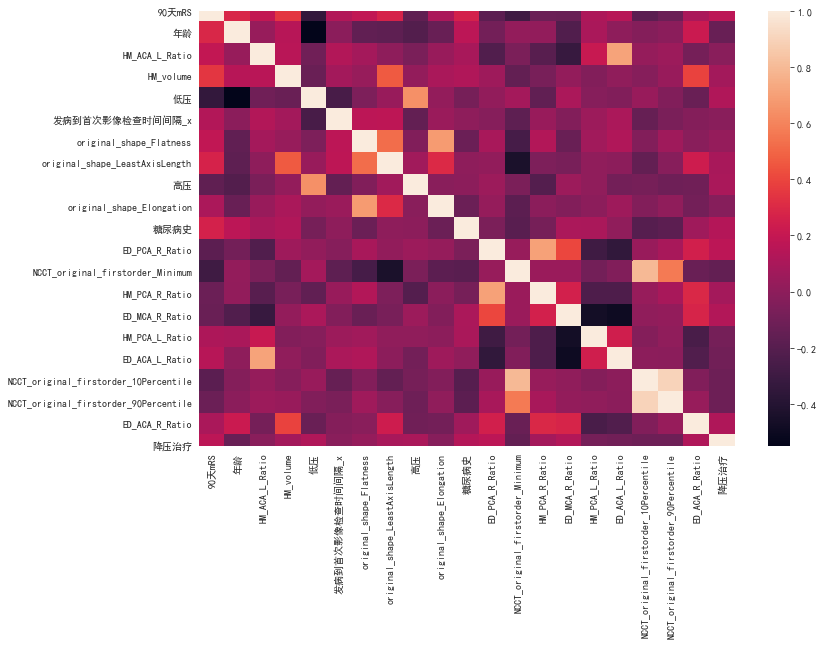

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor_data.corr())
plt.savefig("..\\plots\\3b特征相关性.png", bbox_inches = 'tight', dpi = 600)

In [77]:
tmp_downside = []
for column in tqdm(list(fe_imp_weighed.index)):
    train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']

    base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
    image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
    image_feature_select = list(fe_imp_weighed.index[image_feature_select])
    base_feature_select, image_feature_select

    training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
    training_data
    base_feature_select.remove('follow_up_count')

    res_l_test = res_learner()
    res_l_test.load_data(training_data)
    a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
    tmp_res0 = res_l_test.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
    
    tmp = training_data
    tmp[column] = min(tmp[column])
    # print(tmp)
    res_l_test = res_learner()
    res_l_test.load_data(tmp)
    a = res_l_test.residual_learner(tmp, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
    tmp_res1 = res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
    
    # tmp_res = res_l_test.cal_y_pred(tmp, a, base_feature_select + image_feature_select, True)
    # print(tmp_res, tmp_res0)

    tmp_res = tmp_res1['y_pred'].to_numpy() - tmp_res0['y_pred'].to_numpy()
    
    tmp_downside.append(np.mean(tmp_res))


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


In [78]:
tmp_downside

[0.0,
 0.0,
 0.0,
 0.02,
 0.01,
 0.02,
 0.04,
 0.0,
 0.01,
 -0.01,
 0.06,
 0.01,
 0.01,
 0.01,
 -0.01,
 0.01,
 0.01,
 -0.01,
 0.01,
 0.01]

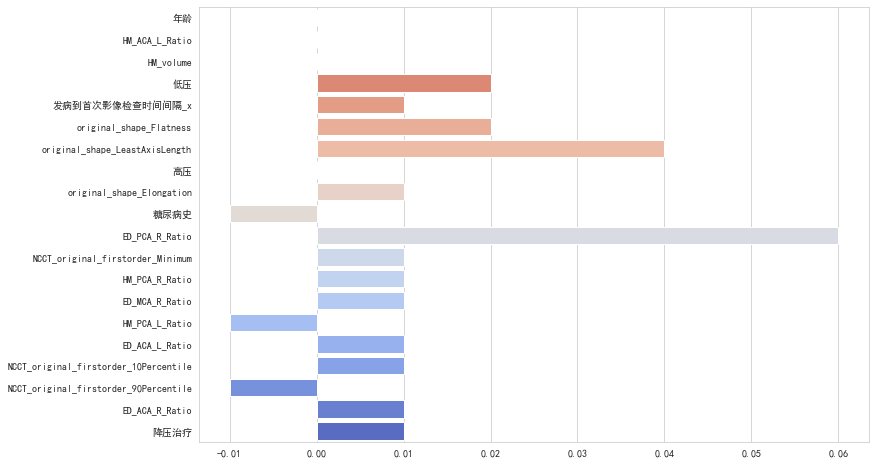

In [83]:
plt.figure(figsize = (12, 8))
sns.barplot(y = list(fe_imp_weighed.index), x = tmp_downside, palette = sns.color_palette("coolwarm_r", len(list(fe_imp_weighed.index))))
plt.savefig('../plots/特征消融实验.png', bbox_inches = 'tight', dpi = 600)

In [84]:
tmp_downside = []
for i_column in tqdm(list(fe_imp_weighed.index)):
    i_res = []
    for j_column in list(fe_imp_weighed.index):
        train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']

        base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
        image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
        image_feature_select = list(fe_imp_weighed.index[image_feature_select])
        base_feature_select, image_feature_select

        training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
        training_data
        base_feature_select.remove('follow_up_count')

        res_l_test = res_learner()
        res_l_test.load_data(training_data)
        a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res0 = res_l_test.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
        
        tmp = training_data
        tmp[i_column] = min(tmp[i_column])
        tmp[j_column] = min(tmp[j_column])
        # print(tmp)
        res_l_test = res_learner()
        res_l_test.load_data(tmp)
        a = res_l_test.residual_learner(tmp, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res1 = res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
        
        # tmp_res = res_l_test.cal_y_pred(tmp, a, base_feature_select + image_feature_select, True)
        # print(tmp_res, tmp_res0)

        tmp_res = tmp_res1['y_pred'].to_numpy() - tmp_res0['y_pred'].to_numpy()
        
        i_res.append(np.mean(tmp_res))
    tmp_downside.append(i_res)


100%|██████████| 20/20 [10:52<00:00, 32.62s/it]


In [87]:
tmpplot = pd.DataFrame(tmp_downside, index = list(fe_imp_weighed.index), columns = list(fe_imp_weighed.index))
tmpplot

,年龄,HM_ACA_L_Ratio,HM_volume,低压,发病到首次影像检查时间间隔_x,original_shape_Flatness,original_shape_LeastAxisLength,高压,original_shape_Elongation,糖尿病史,ED_PCA_R_Ratio,NCCT_original_firstorder_Minimum,HM_PCA_R_Ratio,ED_MCA_R_Ratio,HM_PCA_L_Ratio,ED_ACA_L_Ratio,NCCT_original_firstorder_10Percentile,NCCT_original_firstorder_90Percentile,ED_ACA_R_Ratio,降压治疗
年龄,0.00,-0.01,0.03,0.00,0.00,0.01,0.05,-0.03,0.00,0.01,0.06,0.03,0.00,-0.01,0.00,0.00,0.00,0.00,-0.02,0.01
HM_ACA_L_Ratio,-0.01,0.00,0.03,-0.02,-0.01,0.04,0.04,-0.03,0.03,0.01,0.04,0.01,0.01,0.01,0.03,0.03,0.02,0.00,-0.01,-0.03
HM_volume,0.03,0.03,0.00,-0.01,0.03,0.00,0.06,0.03,0.01,0.01,0.02,0.01,0.04,0.03,0.02,0.03,0.04,0.03,0.01,-0.01
低压,0.00,-0.02,-0.01,0.02,0.02,0.01,0.02,-0.06,0.02,0.01,0.06,0.01,0.01,0.00,0.01,0.03,0.02,0.00,0.02,0.00
发病到首次影像检查时间间隔_x,0.00,-0.01,0.03,0.02,0.01,0.03,0.05,0.00,0.01,-0.01,0.05,0.01,0.01,0.02,0.00,0.03,0.00,0.00,0.02,0.01
original_shape_Flatness,0.01,0.04,0.00,0.01,0.03,0.02,0.03,0.01,0.01,0.02,0.00,0.04,0.01,0.02,0.00,0.02,0.04,0.01,0.00,0.00
original_shape_LeastAxisLength,0.05,0.04,0.06,0.02,0.05,0.03,0.04,0.02,0.04,0.05,0.04,0.04,0.04,0.01,0.02,0.04,0.05,0.04,0.04,0.05
高压,-0.03,-0.03,0.03,-0.06,0.00,0.01,0.02,0.00,0.01,-0.01,0.02,-0.02,0.00,-0.01,-0.03,0.01,0.00,-0.02,0.00,0.00
original_shape_Elongation,0.00,0.03,0.01,0.02,0.01,0.01,0.04,0.01,0.01,0.00,0.05,0.01,0.01,0.03,0.04,0.00,0.02,0.02,0.01,0.01
糖尿病史,0.01,0.01,0.01,0.01,-0.01,0.02,0.05,-0.01,0.00,-0.01,0.04,0.00,0.01,0.01,0.00,0.02,0.01,0.01,-0.01,0.00


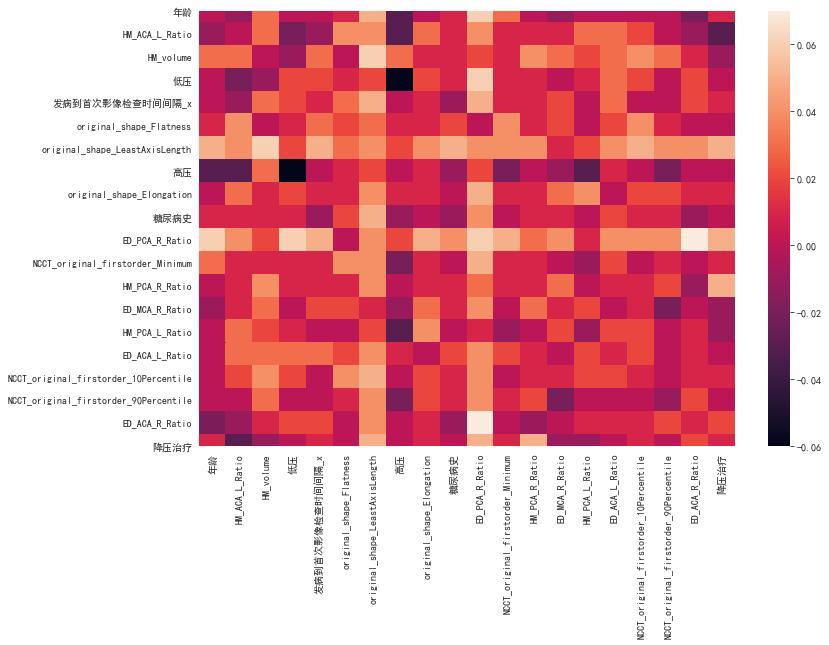

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(tmpplot)
plt.savefig("..\\plots\\3b二维特征消融.png", bbox_inches = 'tight', dpi = 600)

In [97]:
import heapq
tmp_downside = []
for i, i_column in enumerate(list(fe_imp_weighed.index)):
    i_res = []
    if i == 0:
        recurr = list(fe_imp_weighed.index)
    else:
        recurr = list(fe_imp_weighed.index)[tmp_downside[i - 1].index([heapq.nlargest(2, tmp_downside[i - 1])])]
    for j_column in recurr:
        train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']

        base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
        image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
        image_feature_select = list(fe_imp_weighed.index[image_feature_select])
        base_feature_select, image_feature_select

        training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
        training_data
        base_feature_select.remove('follow_up_count')

        res_l_test = res_learner()
        res_l_test.load_data(training_data)
        a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res0 = res_l_test.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
        
        tmp = training_data
        tmp[i_column] = min(tmp[i_column])
        tmp[j_column] = min(tmp[j_column])
        # print(tmp)
        res_l_test = res_learner()
        res_l_test.load_data(tmp)
        a = res_l_test.residual_learner(tmp, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res1 = res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
        
        # tmp_res = res_l_test.cal_y_pred(tmp, a, base_feature_select + image_feature_select, True)
        # print(tmp_res, tmp_res0)

        tmp_res = tmp_res1['y_pred'].to_numpy() - tmp_res0['y_pred'].to_numpy()
        
        i_res.append(np.mean(tmp_res))
    tmp_downside.append(i_res)


KeyError: 'E'

In [112]:
fs = []
for i in range(3):
    tmp_list = []
    recurr = []
    for x in list(fe_imp_weighed.index):
        if x not in tmp_list:
            recurr.append(x)
    for feature in recurr:
        tmp_fs = fs + [feature]
        
        train_data = preprocess_data[preprocess_data['数据集划分'] == '训练']

        base_feature_select = ['年龄', '低压', '高压', '发病到首次影像检查时间间隔_x', '降压治疗', '糖尿病史'] + ['follow_up_count', 'time_from_disease']
        image_feature_select = [x not in base_feature_select for x in fe_imp_weighed.index]
        image_feature_select = list(fe_imp_weighed.index[image_feature_select])
        base_feature_select, image_feature_select

        training_data = train_data[['ID', '90天mRS'] + base_feature_select + image_feature_select]
        training_data
        base_feature_select.remove('follow_up_count')

        res_l_test = res_learner()
        res_l_test.load_data(training_data)
        a = res_l_test.residual_learner(training_data, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res0 = res_l_test.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
            
        tmp = training_data
        for column in tmp_fs:

            tmp[column] = min(tmp[column])
            # print(tmp)
        res_l_test = res_learner()
        res_l_test.load_data(tmp)
        a = res_l_test.residual_learner(tmp, 'BayesianRidge', base_feature_select + image_feature_select, '90天mRS')
        tmp_res1 = res_l.cal_y_pred(training_data, a, base_feature_select + image_feature_select)
            
            # tmp_res = res_l_test.cal_y_pred(tmp, a, base_feature_select + image_feature_select, True)
            # print(tmp_res, tmp_res0)

        tmp_res = tmp_res1['y_pred'].to_numpy() - tmp_res0['y_pred'].to_numpy()
            
        tmp_list.append(np.mean(tmp_res))
        
    tmpf = list(fe_imp_weighed.index)[tmp_list.index(max(np.abs(tmp_list)))]
    fs = fs + [tmpf]
            

In [113]:
fs

['ED_PCA_R_Ratio', 'ED_ACA_R_Ratio', '发病到首次影像检查时间间隔_x']